# Example code for OSL Learning
We will use the

In [13]:
import torch

import matplotlib.pyplot as plt

from datasets.openml_datasets import OpenML_Dataset
from datasets.torch_datasets import Torch_Dataset
from utils.weakener import Weakener
from models.model import MLP
from utils.losses import PartialLoss,LBLoss,EMLoss,OSLCELoss,OSLBrierLoss
from utils.trainig_testing import train_model,evaluate_model,train_and_evaluate

The steps you might want to take for running the full 'weakening - learning - evaluating' experience
<ol>
<li> Loading the clean dataset: <code>Data = OpemML_Dataset('name')</code></li>
<li> Setting the Weakener class: <code>Weak = Weakener(Data.num_classes)</code></li>
<ol>
<li> Generate the mixing matrix: <code>WL.generate_M(model_class='pll')</code></li>
<li> Generate the weak labels <em>(z=index,w=one_hot)</em>: <code>z, w = WL.generate_weak(train_y)</code></li>
<ul style="list-style: none;">
 <li>Generating virtual label matrix or virtual labels is not necessary when training an OSL Learning algorithm as it only uses the weak labels</li>
</ul>
</ol>
<li>Generate the dataloaders (trainloader/testloader) for the dataset enhaced with the weak labels</li>
<ol>
<li> Include weak labels into the dataset: <code>Data.include_weak(Weak.w)</code></li>
<li> Generate the dataloaders: <code>trainloader, testloader = Data.get_dataloader()</code></li>
</ol>
<li> We create the mlp: <code>mlp = MLP(Data.num_features,[Data.num_features],Data.num_classes,dropout_p=0.5)</code></li>
</ol>

Fasten your seatbelt!

In [14]:
#Data = OpenML_Dataset('iris')
Data = Torch_Dataset('mnist')
train_x, train_y, test_x, test_y = Data.get_data()
# WL stores processes relative to the Weakening process
Weak = Weakener(Data.num_classes)
Weak.generate_M(model_class='pll')

In [15]:
z, w = Weak.generate_weak(train_y)

In [16]:
Data.include_weak(Weak.w)

In [17]:
trainloader, testloader = Data.get_dataloader()



In [20]:
mlp = MLP(Data.num_features,[Data.num_features],Data.num_classes,dropout_p=0.3)
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.001)
loss_fn = OSLCELoss()

mlp,results = train_and_evaluate(mlp,trainloader,testloader,optimizer,loss_fn,num_epochs=10)

Epoch 1/10: Train Loss: 3.4763, Train Acc: 0.7976, Test Acc: 0.9032
Epoch 2/10: Train Loss: 0.4075, Train Acc: 0.8650, Test Acc: 0.9011
Epoch 3/10: Train Loss: 0.3501, Train Acc: 0.8748, Test Acc: 0.9197
Epoch 4/10: Train Loss: 0.3291, Train Acc: 0.8819, Test Acc: 0.9140
Epoch 5/10: Train Loss: 0.3158, Train Acc: 0.8850, Test Acc: 0.9246
Epoch 6/10: Train Loss: 0.3026, Train Acc: 0.8877, Test Acc: 0.9235
Epoch 7/10: Train Loss: 0.3030, Train Acc: 0.8906, Test Acc: 0.9300
Epoch 8/10: Train Loss: 0.2864, Train Acc: 0.8937, Test Acc: 0.9320
Epoch 9/10: Train Loss: 0.2755, Train Acc: 0.8931, Test Acc: 0.9307
Epoch 10/10: Train Loss: 0.2634, Train Acc: 0.8949, Test Acc: 0.9271


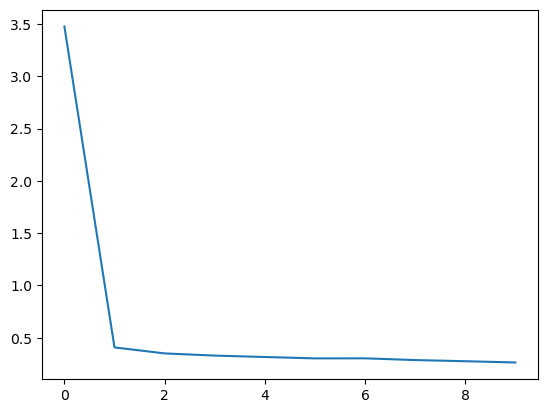

In [21]:
plt.plot(results['train_loss'])

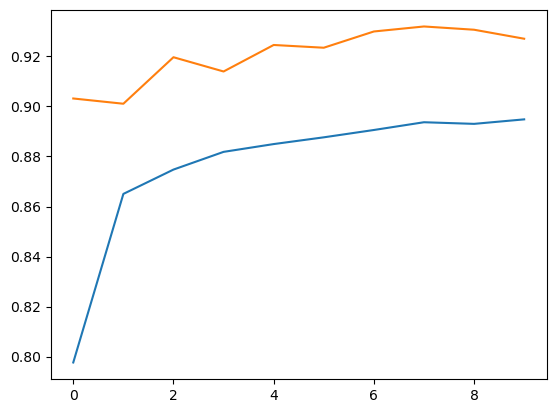

In [22]:
plt.plot(results['train_acc'])
plt.plot(results['test_acc'])

In [9]:
trainloader, testloader = Data.get_dataloader()



In [10]:
mlp = MLP(Data.num_features,[Data.num_features],Data.num_classes,dropout_p=0.)
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.001)
loss_fn = PartialLoss(Weak.w)

mlp,results = train_and_evaluate(mlp,trainloader,testloader,optimizer,loss_fn,num_epochs=10)

Epoch 1/10: Train Loss: 6.9150, Train Acc: 0.1169, Test Acc: 0.1003
Epoch 2/10: Train Loss: nan, Train Acc: 0.1002, Test Acc: 0.1000
Epoch 3/10: Train Loss: nan, Train Acc: 0.1000, Test Acc: 0.1000
Epoch 4/10: Train Loss: nan, Train Acc: 0.1000, Test Acc: 0.1000
Epoch 5/10: Train Loss: nan, Train Acc: 0.1000, Test Acc: 0.1000
Epoch 6/10: Train Loss: nan, Train Acc: 0.1000, Test Acc: 0.1000
Epoch 7/10: Train Loss: nan, Train Acc: 0.1000, Test Acc: 0.1000
Epoch 8/10: Train Loss: nan, Train Acc: 0.1000, Test Acc: 0.1000
Epoch 9/10: Train Loss: nan, Train Acc: 0.1000, Test Acc: 0.1000
Epoch 10/10: Train Loss: nan, Train Acc: 0.1000, Test Acc: 0.1000


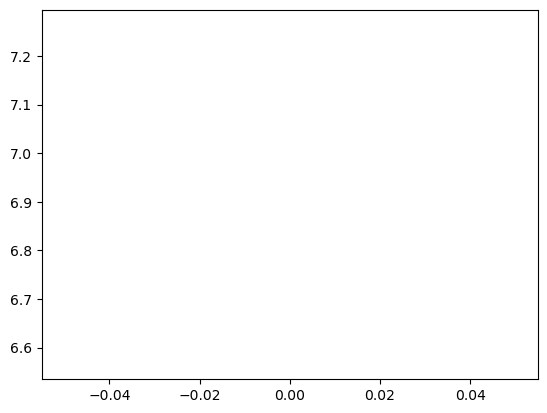

In [11]:
plt.plot(results['train_loss'])

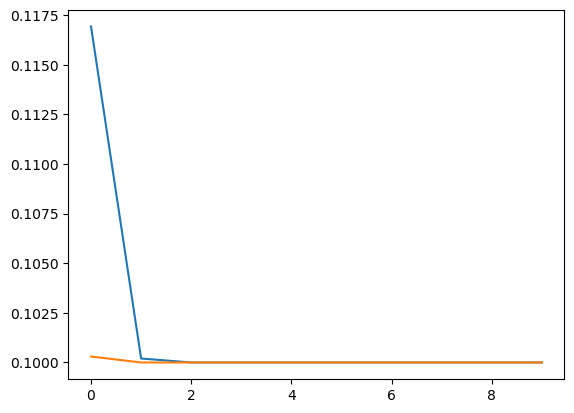

In [12]:
plt.plot(results['train_acc'])
plt.plot(results['test_acc'])